# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_results = pd.merge(study_results,mouse_metadata,on = ['Mouse ID'])

# Display the data table for preview
metadata_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Checking the number of mice.
metadata_results['Mouse ID'].nunique()

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = metadata_results[metadata_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

metadata_results.loc[metadata_results['Mouse ID'] == duplicate_mouse[0],:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_metadata_results = metadata_results.loc[metadata_results['Mouse ID'] != duplicate_mouse[0]]
clean_metadata_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [ ]:
# Checking the number of mice in the clean DataFrame.
clean_metadata_results['Mouse ID'].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_metadata_results.groupby('Drug Regimen')


summary_df = pd.merge(grouped_df['Tumor Volume (mm3)'].mean(),grouped_df['Tumor Volume (mm3)'].median(),on = ['Drug Regimen']).merge(grouped_df['Tumor Volume (mm3)'].var(),on =['Drug Regimen'])\
    .merge(grouped_df['Tumor Volume (mm3)'].std(),on = ['Drug Regimen']).merge(grouped_df['Tumor Volume (mm3)'].sem(), on= ['Drug Regimen'])
summary_df.columns=[['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']]
summary_df 




C:\Users\sethipankaj\AppData\Local\Temp\ipykernel_14048\3865907539.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  summary_df = pd.merge(grouped_df['Tumor Volume (mm3)'].mean(),grouped_df['Tumor Volume (mm3)'].median(),on = ['Drug Regimen']).merge(grouped_df['Tumor Volume (mm3)'].var(),on =['Drug Regimen'])\


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_df = grouped_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_df


C:\Users\sethipankaj\AppData\Local\Temp\ipykernel_14048\1296681296.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_df = grouped_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

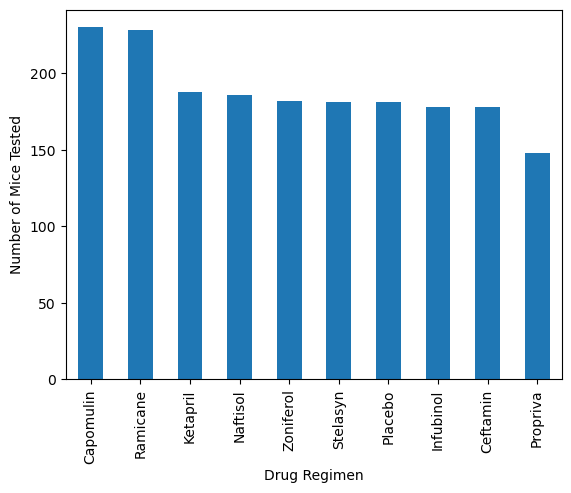

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
micecount = clean_metadata_results['Drug Regimen'].value_counts()
micecount.plot(kind='bar',xlabel = 'Drug Regimen',ylabel = 'Number of Mice Tested')

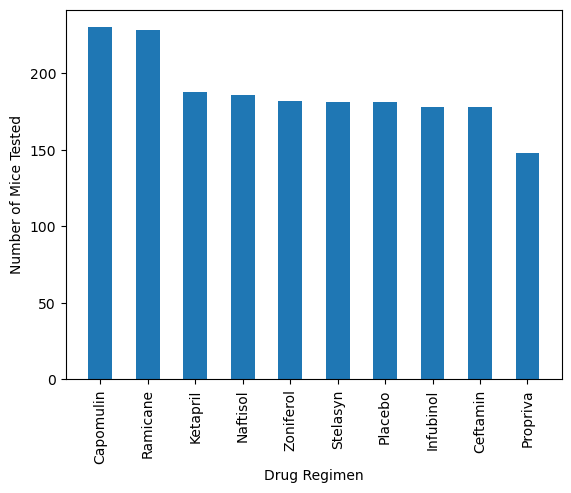

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = micecount.index.values
y_axis = micecount.values
plt.bar(x_axis,y_axis,width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


<AxesSubplot:ylabel='Sex'>

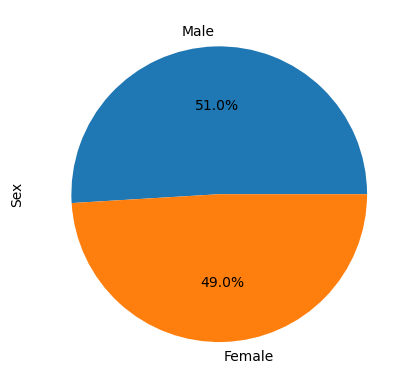

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_metadata_results['Sex'].value_counts()
sex_distribution.plot(kind='pie',autopct="%1.1f%%")


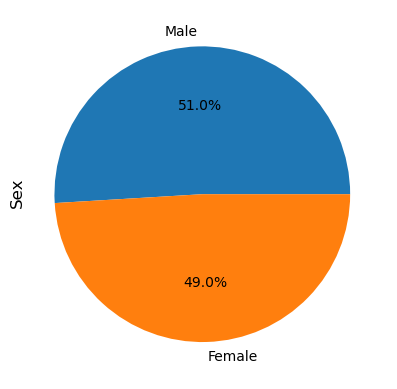

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution,labels=sex_distribution.index.values,autopct="%1.1f%%")
plt.title('Sex', x=0,y=0.45,rotation=90)
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_metadata_results.groupby('Mouse ID')['Timepoint'].max()
max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_df = clean_metadata_results.loc[(clean_metadata_results["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])),
                                         ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

max_tumor = pd.merge(filtered_df,max_timepoint,on=['Mouse ID','Timepoint'])

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[],[],[],[]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_tumor = max_tumor[["Drug Regimen","Tumor Volume (mm3)"]]
# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 

for index,row in drug_tumor.iterrows():
    if row['Drug Regimen'] == "Capomulin":
        tumor_vol[0].append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == "Ramicane":
        tumor_vol[1].append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == "Infubinol":
        tumor_vol[2].append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == "Ceftamin":
        tumor_vol[3].append(row['Tumor Volume (mm3)'])                
        
# Determine outliers using upper and lower bounds
for i in range(4):
    quartiles = pd.DataFrame(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0][0.25]
    upperq = quartiles[0][0.75]
    iqr = upper-lower
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = []
    for j in tumor_vol[i]:
        if j < lower_bound or j> upper_bound:
            outlier.append(j)
    print(f"{treatments [i]}'s potential outliers: {outlier}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


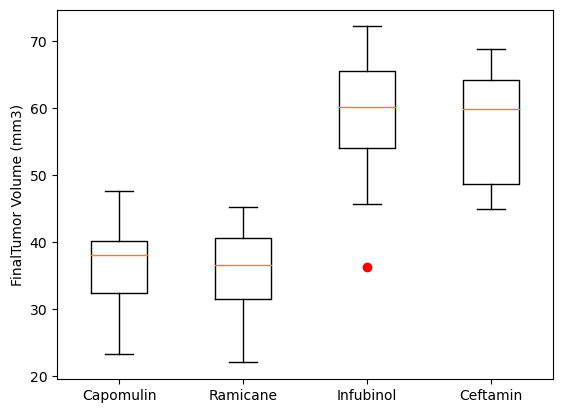

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('FinalTumor Volume (mm3)')

ax1.boxplot(tumor_vol,labels=treatments,sym='r')
plt.show()

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse b128'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

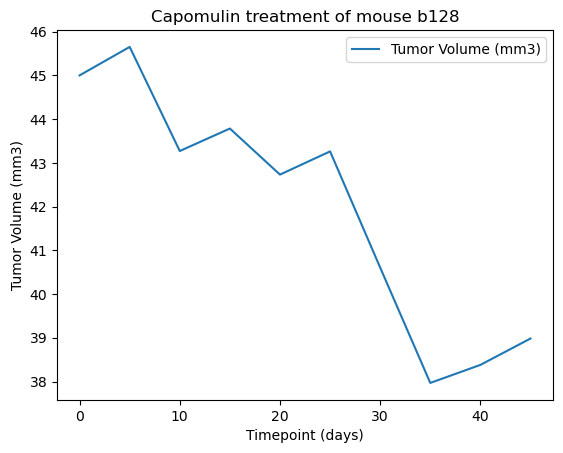

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

clean_metadata_results.loc[(clean_metadata_results['Drug Regimen'] == 'Capomulin') 
& (clean_metadata_results['Mouse ID'] == 'b128'),['Timepoint','Tumor Volume (mm3)']].plot.line(x='Timepoint',xlabel = 'Timepoint (days)',
ylabel = 'Tumor Volume (mm3)',title = 'Capomulin treatment of mouse b128')

<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

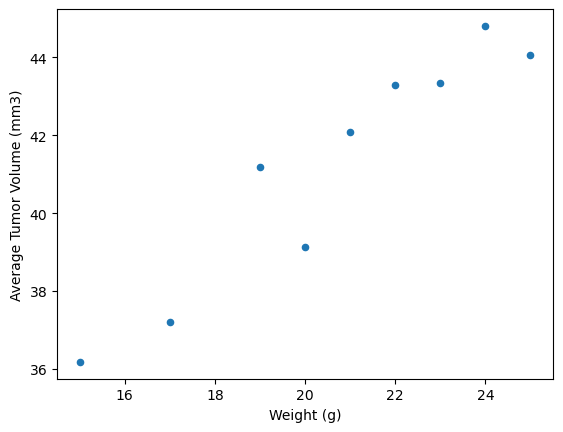

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df=clean_metadata_results.loc[(clean_metadata_results['Drug Regimen'] == 'Capomulin'),['Weight (g)',
'Tumor Volume (mm3)']].groupby('Weight (g)').mean()
scatter_df['Weight (g)'] = scatter_df.index.values
scatter_df.plot(kind='scatter', x ='Weight (g)', y = 'Tumor Volume (mm3)',ylabel = 'Average Tumor Volume (mm3)')


## Correlation and Regression

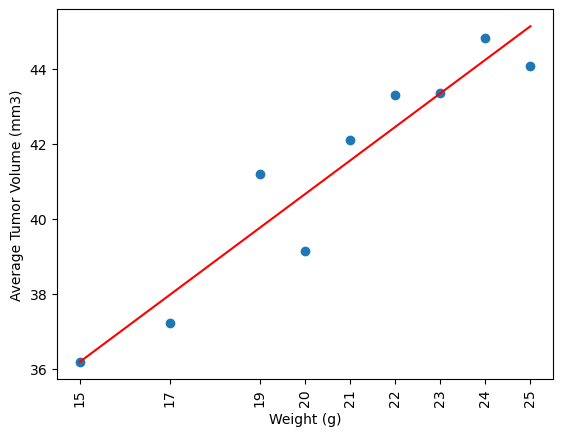

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])
pe_fit = pe_slope * scatter_df['Weight (g)'] + pe_int
plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])
plt.plot(scatter_df['Weight (g)'],pe_fit,"-",color = 'r')
plt.xticks(scatter_df['Weight (g)'], rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
